##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of unique classes: {num_classes}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
Number of unique classes: 10


In [2]:
# Define class names
class_names = ["T-shirt/top",  
                "Trouser",      
                "Pullover",     
                "Dress",        
                "Coat",         
                "Sandal",       
                "Shirt",         
                "Sneaker",      
                "Bag",        
                "Ankle boot"]   

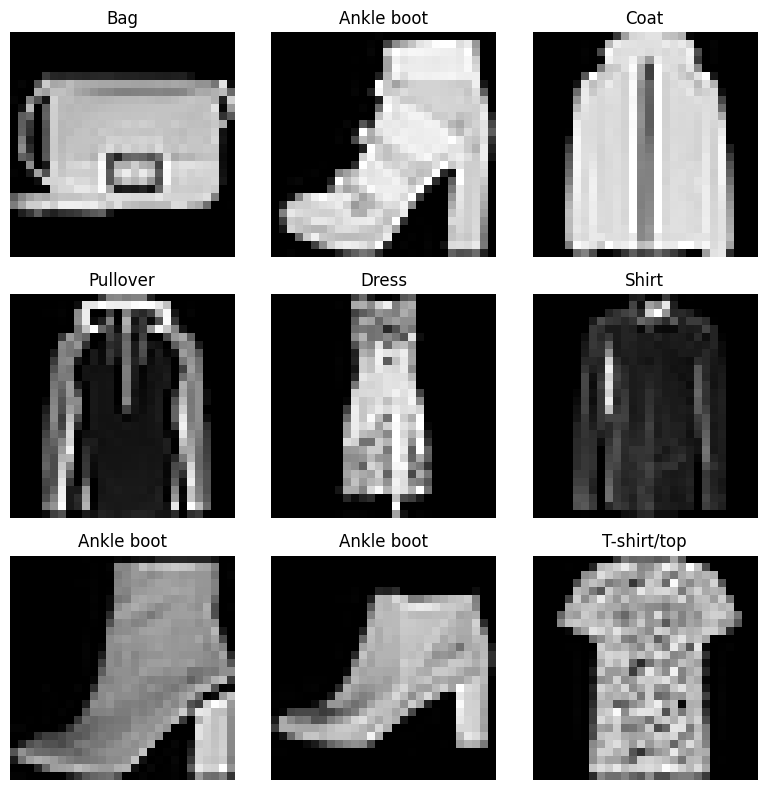

In [3]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(8, 8))

random_indices = np.random.choice(x_train.shape[0], 9, replace=False)
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()

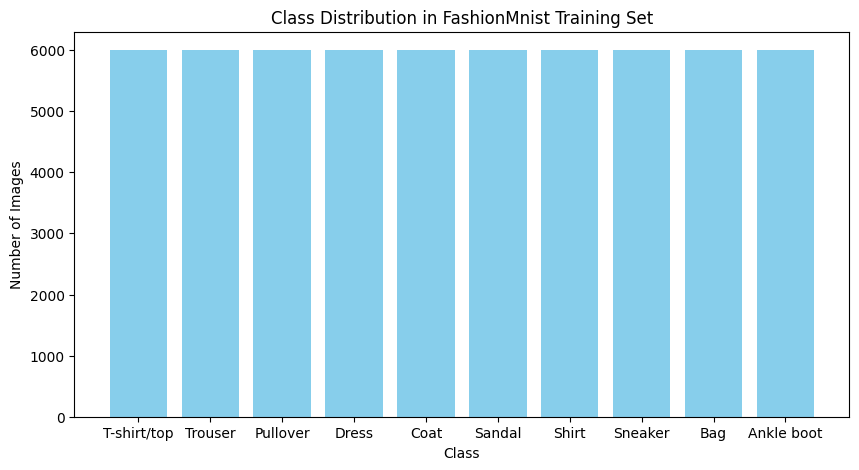

In [4]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train.flatten())

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.title("Class Distribution in FashionMnist Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [11]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape data to include the channel dimension (needed for Conv2D)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values for x_train and x_test
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
# Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

# Build a CNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 47ms/step - accuracy: 0.7758 - loss: 0.6076
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8494 - loss: 0.4146
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8661 - loss: 0.3698
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.8744 - loss: 0.3420
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.8834 - loss: 0.3210
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.8868 - loss: 0.3072
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.8921 - loss: 0.2933
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.8942 - loss: 0.2850
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.8992 - loss: 0.2749
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9003 - loss: 0.2675

 Test accuracy: 0.9110999703407288
